In [184]:
import os
import re
import sys
import csv
import time
import json
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from scipy import optimize
from scipy.stats import chi2, norm
from scipy.integrate import quad
from scipy.special import erfinv

from sklearn.metrics.pairwise import pairwise_distances

import torch
import falkon

sys.path.insert(0, "../notebooks")
from plot_utils import plot_one_t, plot_two_t


## PARAMETER TUNING ($N_s = 0$)

### TUNING

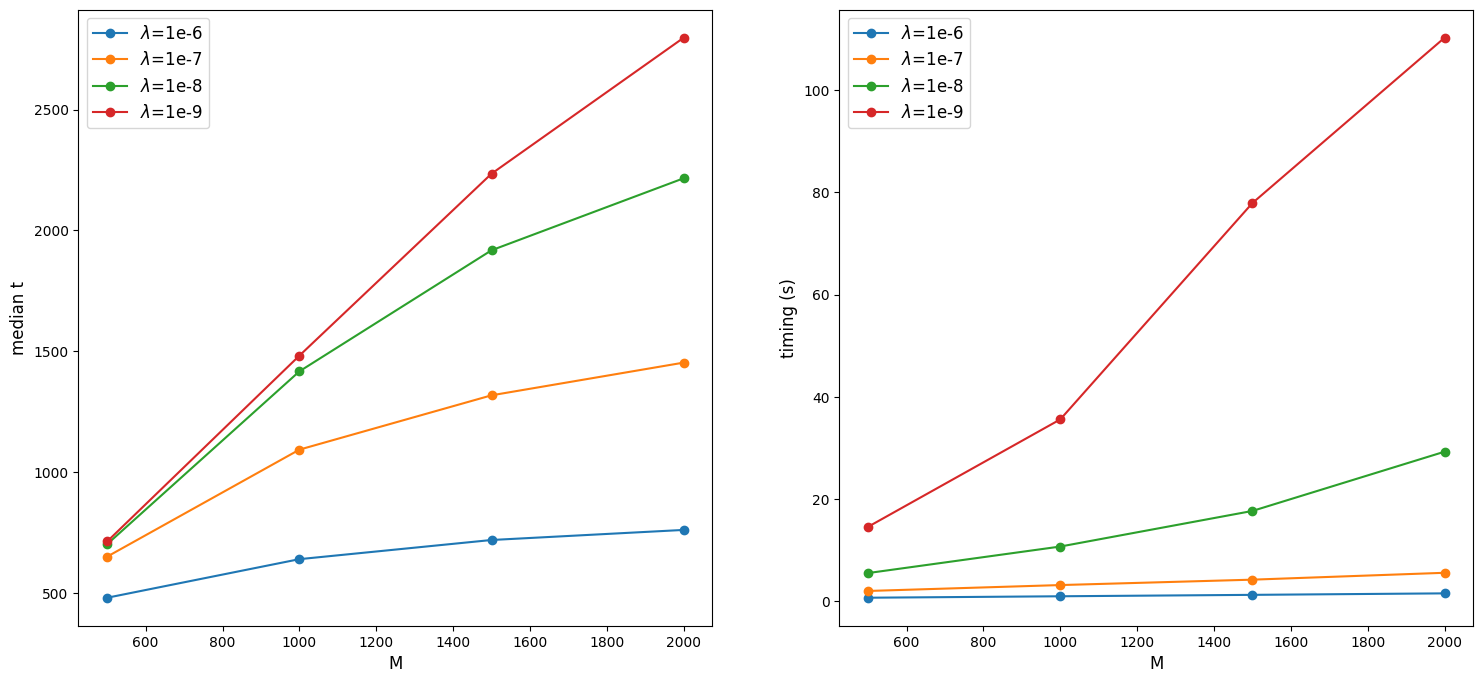

In [2]:
df_m = pd.read_csv("/home/ubuntu/NPLM-Falkon/output/bank_data/results/results.csv", sep="\t")

fig, ax = plt.subplots(figsize=(18,8), nrows=1, ncols=2)
df_m = df_m.sort_values('M', ascending =False)  

ax[0].plot(df_m[df_m['lambda']==1e-6]['M'], df_m[df_m['lambda']==1e-6]['median'], marker='o', markersize=6, label="$\lambda$=1e-6")
ax[0].plot(df_m[df_m['lambda']==1e-7]['M'], df_m[df_m['lambda']==1e-7]['median'], marker='o', markersize=6, label="$\lambda$=1e-7")
ax[0].plot(df_m[df_m['lambda']==1e-8]['M'], df_m[df_m['lambda']==1e-8]['median'], marker='o', markersize=6, label="$\lambda$=1e-8")
ax[0].plot(df_m[df_m['lambda']==1e-9]['M'], df_m[df_m['lambda']==1e-9]['median'], marker='o', markersize=6, label="$\lambda$=1e-9")

# ax[0].errorbar(df_m[df_m['lambda']==1e-6]['M'], df_m[df_m['lambda']==1e-6]['median'], yerr = 1.2533*(df_m[df_m['lambda']==1e-6]['std'])/np.sqrt(config['toys']), ecolor='black', capsize=2)
# ax[0].errorbar(df_m[df_m['lambda']==1e-7]['M'], df_m[df_m['lambda']==1e-7]['median'], yerr = 1.2533*(df_m[df_m['lambda']==1e-7]['std'])/np.sqrt(config['toys']), ecolor='black', capsize=2)
# ax[0].errorbar(df_m[df_m['lambda']==1e-8]['M'], df_m[df_m['lambda']==1e-8]['median'], yerr = 1.2533*(df_m[df_m['lambda']==1e-8]['std'])/np.sqrt(config['toys']), ecolor='black', capsize=2)
# ax[0].errorbar(df_m[df_m['lambda']==1e-9]['M'], df_m[df_m['lambda']==1e-9]['median'], yerr = 1.2533*(df_m[df_m['lambda']==1e-9]['std'])/np.sqrt(config['toys']), ecolor='black', capsize=2)

ax[0].set_xlabel('M', fontsize=12)
ax[0].set_ylabel('median t', fontsize=12)
ax[0].legend(fontsize =12)

ax[1].plot(df_m[df_m['lambda']==1e-6]['M'], df_m[df_m['lambda']==1e-6]['timing'], marker='o', markersize=6, label="$\lambda$=1e-6")
ax[1].plot(df_m[df_m['lambda']==1e-7]['M'], df_m[df_m['lambda']==1e-7]['timing'], marker='o', markersize=6, label="$\lambda$=1e-7")
ax[1].plot(df_m[df_m['lambda']==1e-8]['M'], df_m[df_m['lambda']==1e-8]['timing'], marker='o', markersize=6, label="$\lambda$=1e-8")
ax[1].plot(df_m[df_m['lambda']==1e-9]['M'], df_m[df_m['lambda']==1e-9]['timing'], marker='o', markersize=6, label="$\lambda$=1e-9")

ax[1].set_xlabel('M', fontsize=12)
ax[1].set_ylabel('timing (s)', fontsize=12)
ax[1].legend(fontsize =12)

# plt.savefig('/home/ubuntu/NPLM-Falkon/plot/bank/median_t_vs_M.png', format='png', dpi=300, facecolor="white")

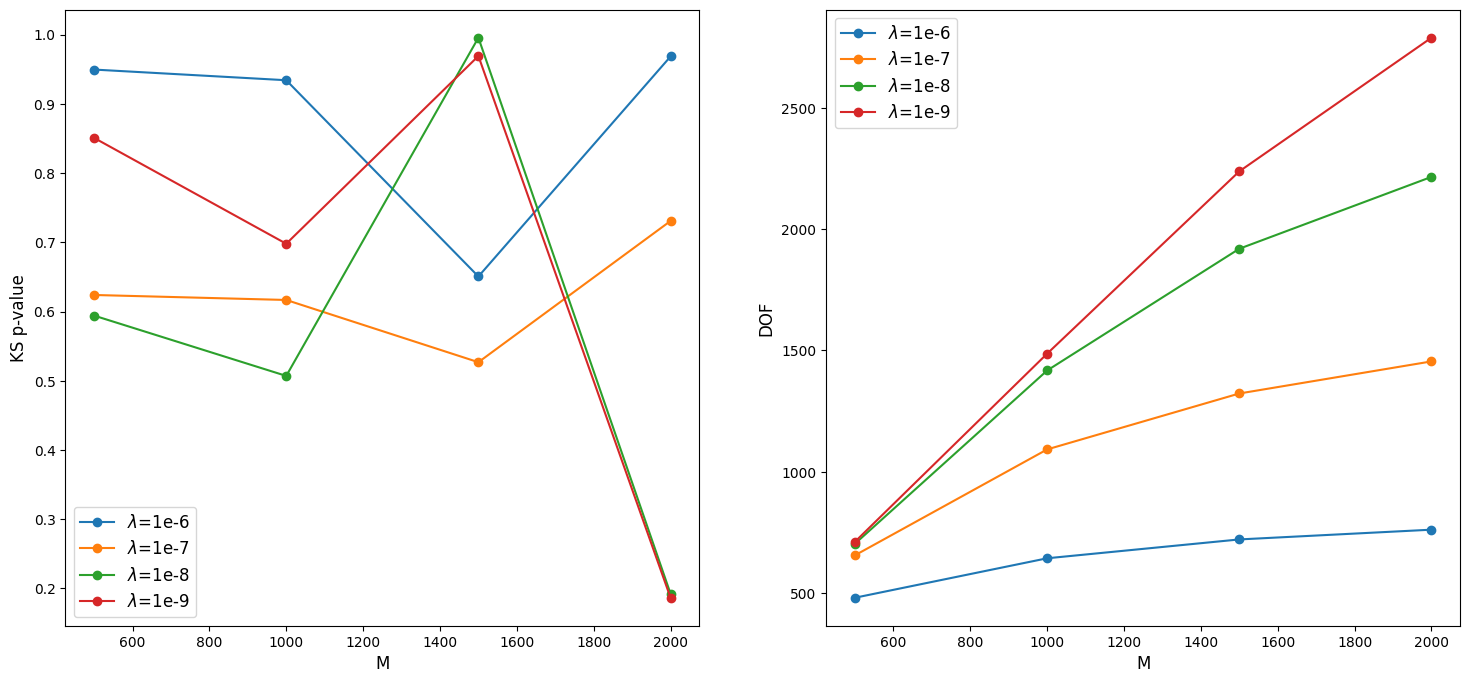

In [3]:
df_m = pd.read_csv("/home/ubuntu/NPLM-Falkon/output/bank_data/results/results.csv", sep="\t")

fig, ax = plt.subplots(figsize=(18,8), nrows=1, ncols=2)
df_m = df_m.sort_values('M', ascending =False)  

ax[0].plot(df_m[df_m['lambda']==1e-6]['M'], df_m[df_m['lambda']==1e-6]['p_value'], marker='o', markersize=6, label="$\lambda$=1e-6")
ax[0].plot(df_m[df_m['lambda']==1e-7]['M'], df_m[df_m['lambda']==1e-7]['p_value'], marker='o', markersize=6, label="$\lambda$=1e-7")
ax[0].plot(df_m[df_m['lambda']==1e-8]['M'], df_m[df_m['lambda']==1e-8]['p_value'], marker='o', markersize=6, label="$\lambda$=1e-8")
ax[0].plot(df_m[df_m['lambda']==1e-9]['M'], df_m[df_m['lambda']==1e-9]['p_value'], marker='o', markersize=6, label="$\lambda$=1e-9")

ax[0].set_xlabel('M', fontsize=12)
ax[0].set_ylabel('KS p-value', fontsize=12)
ax[0].legend(fontsize=12)

ax[1].plot(df_m[df_m['lambda']==1e-6]['M'], df_m[df_m['lambda']==1e-6]['dof'], marker='o', markersize=6, label="$\lambda$=1e-6")
ax[1].plot(df_m[df_m['lambda']==1e-7]['M'], df_m[df_m['lambda']==1e-7]['dof'], marker='o', markersize=6, label="$\lambda$=1e-7")
ax[1].plot(df_m[df_m['lambda']==1e-8]['M'], df_m[df_m['lambda']==1e-8]['dof'], marker='o', markersize=6, label="$\lambda$=1e-8")
ax[1].plot(df_m[df_m['lambda']==1e-9]['M'], df_m[df_m['lambda']==1e-9]['dof'], marker='o', markersize=6, label="$\lambda$=1e-9")

ax[1].set_xlabel('M', fontsize=12)
ax[1].set_ylabel('DOF', fontsize=12)
ax[1].legend(fontsize =12)

# plt.savefig('/home/ubuntu/NPLM-Falkon/plot/bank/p_value_vs_M.png', format='png', dpi=300, facecolor="white")


### BEST t distribution 

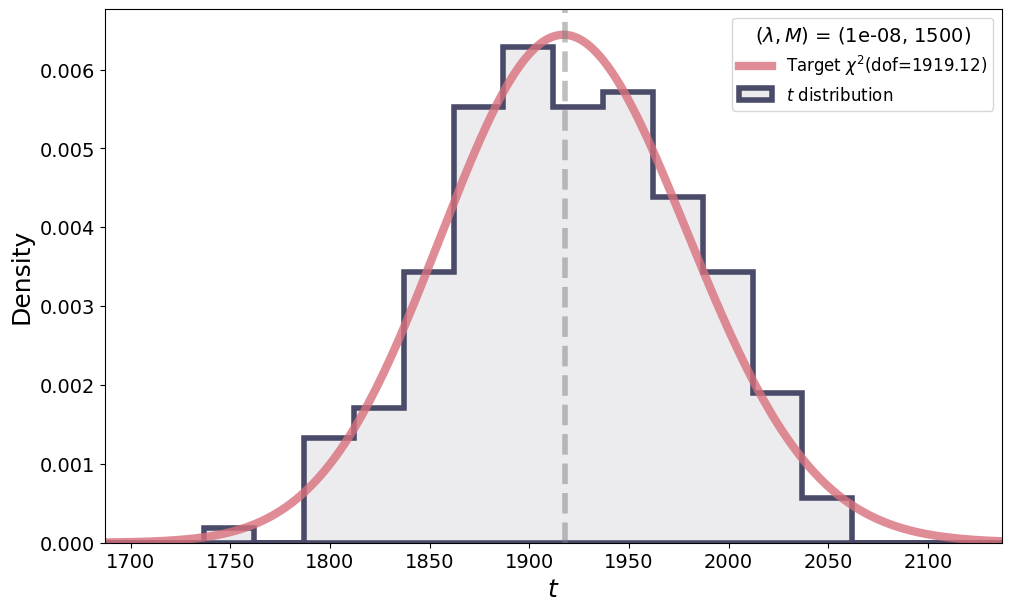

In [4]:
l=1e-8;     M=1500
with open('../output/bank_data/2024_2_23_8-20/ttest_time_'+str(l)+'_'+str(M)+'.csv') as f:
    t_ref_final = np.array([float(row.split()[0]) for row in f])

df_fit, loc, scale = chi2.fit(t_ref_final, floc=0, fscale=1)
t_ref_bins  = np.arange(int(np.min(t_ref_final))-50, int(np.max(t_ref_final))+100, 25)
xgrid_ref   = np.arange(int(np.min(t_ref_final))-100, int(np.max(t_ref_final))+100, 2)

ref_chi2 = chi2(df=df_fit)

plot_one_t(
    t_distribution  = t_ref_final,
    t_bins          = t_ref_bins,
    chi2            = ref_chi2,
    chi2_grid       = xgrid_ref,
    show_hist       = True,
    show_error      = False,
    compute_rate    = False,
    err_marker      = "o",
    err_markersize  = 10,
    err_capsize     = 5,
    err_elinewidth  = 4,
    err_capthick    = 4,
    err_color       = "black",
    figsize         = (10, 6),
    fontsize        = 18,
    cms             = False,
    cms_label       = "",
    cms_rlabel      = "",
    hist_ecolor     = ("#494B69", 1.0),
    hist_fcolor     = ("#494B69", 0.1),
    chi2_color      = ("#D8707C", 0.8),
    hist_lw         = 4,
    chi2_lw         = 6,
    hist_type       = "stepfilled",
    hist_label      = "$\it{t}$ distribution",
    chi2_label      = "Target $\chi^2$(dof=%.2f)"%(df_fit),
    xlabel          = r"$t$",
    ylabel          = "Density",
    show_plot       = True,
    save_plot       = False,
    plot_name       = "t_distribution_"+str(l)+"_"+str(M),
    plot_path       = "",
    plot_format     = "png",
    return_fig      = False,
    plot_params     = True,
    hyperparams     = str(l)+", "+str(M),

)

# SIGNAL $\neq$ 0

## SHAPE and RENORMALIZATION


In [70]:
dir = '2024_2_28_11_6_sig_100'
path = '/home/ubuntu/NPLM-Falkon/output/bank_data/'+dir+'/'
json_path = path+dir+'.json'
with open(json_path) as f:
    config = json.load(f)
config

{'OUTPUT_PATH': '/home/ubuntu/NPLM-Falkon/output/bank_data/',
 'DATA_PATH': '/home/ubuntu/NPLM-Falkon/data/creditcard.csv',
 'PLOT_PATH': '/home/ubuntu/NPLM-Falkon/plot/bank/',
 'toys': 100,
 'N_REF': 3000,
 'N_BKG': 1000,
 'N_SIG': 100,
 'M_list': [1500],
 'l_list': [1e-08],
 'sigma': 9.528979837939284,
 'shape_only': False}

#### Plot the two t distribution

In [71]:
with open(path + '/ttest_time_'+str(l)+'_'+str(M)+'.csv') as f:
    t_data_final = np.array([float(row.split()[0]) for row in f])


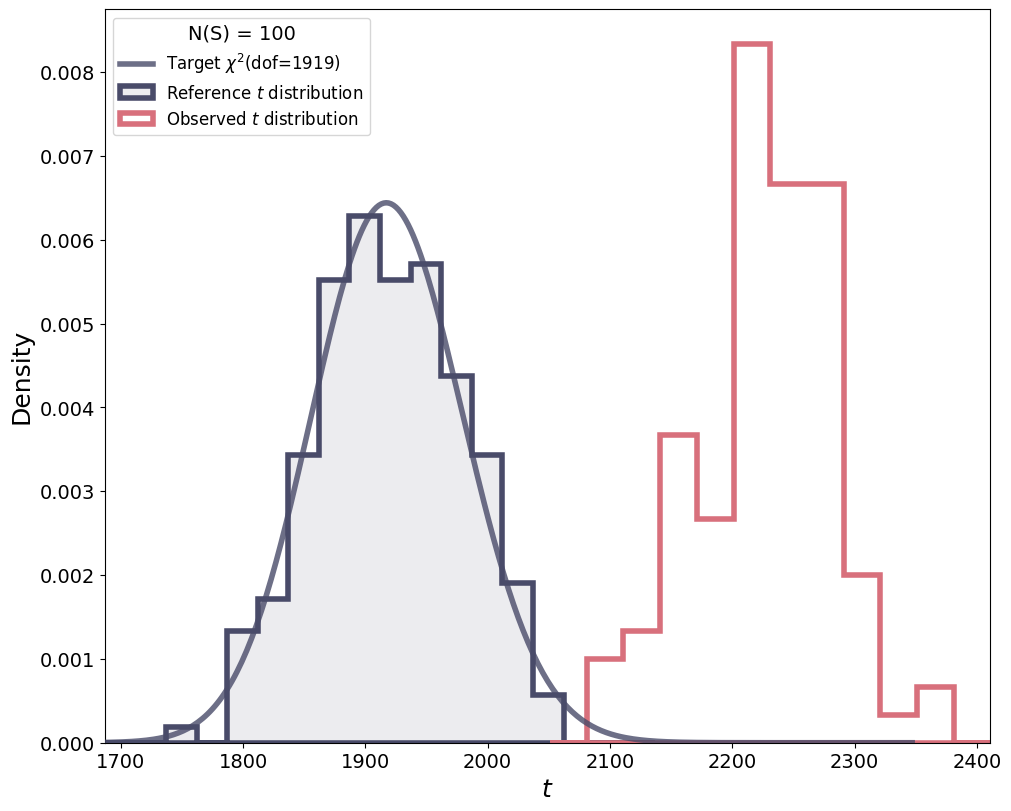

In [76]:
t_data_bins = np.arange(int(np.min(t_data_final))-50, int(np.max(t_data_final))+50, 30)
xgrid_data  = np.arange(int(np.min(t_data_final))-50, int(np.max(t_data_final))+50, 2)
t_ref_bins  = np.arange(int(np.min(t_ref_final))-50, int(np.max(t_ref_final))+100, 25)
xgrid_ref   = np.arange(int(np.min(t_ref_final))-100, int(np.max(t_ref_final))+300, 2)

plot_two_t(
    t_distribution_1  = np.array(t_ref_final),
    t_bins_1          = t_ref_bins,
    t_distribution_2  = np.array(t_data_final),
    t_bins_2          = t_data_bins,
    chi2              = ref_chi2,
    chi2_grid         = xgrid_ref,
    show_error_1      = False,
    show_error_2      = False,
    show_hist_1       = True,
    show_hist_2       = True,
    compute_rate_1    = False,
    compute_rate_2    = False,
    err_marker_1      = "o",
    err_marker_2      = "o",
    err_markersize_1  = 10,
    err_markersize_2  = 10,
    err_capsize_1     = 5,
    err_capsize_2     = 5,
    err_elinewidth_1  = 4,
    err_elinewidth_2  = 4,
    err_capthick_1    = 4,
    err_capthick_2    = 4,
    figsize           = (10, 8),
    fontsize          = 18,
    cms               = False,
    cms_label         = "",
    cms_rlabel        = "",
    hist_ecolor_1     = ("#494B69", 1),
    hist_ecolor_2     = ("#D8707C", 1),
    hist_fcolor_1     = ("#494B69", 0.1),
    hist_fcolor_2     = ("#D8707C", 0),
    err_ecolor_1      = ("#494B69", 1),
    err_ecolor_2      = ("#D8707C", 1),
    chi2_color        = ("#494B69", 0.8),
    hist_lw_1         = 4,
    hist_lw_2         = 4,
    chi2_lw           = 4,
    hist_type_1       = "stepfilled",
    hist_type_2       = "stepfilled",
    hist_label_1      = "Reference $\it{t}$ distribution",
    hist_label_2      = "Observed $\it{t}$ distribution",
    chi2_label        = "Target $\chi^2$(dof=%i)"%(df_fit),
    xlabel            = "$\it{t}$",
    ylabel            = "Density",
    show_plot         = True,
    save_plot         = False,
    plot_name         = "t_distribution_signal",
    plot_path         = "/home/ubuntu/NPLM-Falkon/output/bank_data/results/results.csv",
    plot_format       = "png",
    return_fig        = False,
    plot_params       = True,
    hyperparams       = str(l)+", "+str(M),
    N_SIG             = config['N_SIG']  
)

In [77]:
t_obs = np.median(t_data_final)
p_val = 1 - ref_chi2.cdf(t_obs)
print(1-chi2.cdf(np.median(t_data_final), df_fit))
Z_obs     = norm.ppf(chi2.cdf(np.median(t_data_final), df_fit))
t_obs_err = 1.2533*np.std(t_data_final)*1./np.sqrt(config['toys'])
Z_obs_p   = norm.ppf(chi2.cdf(np.median(t_data_final)+t_obs_err, df_fit))
Z_obs_m   = norm.ppf(chi2.cdf(np.median(t_data_final)-t_obs_err, df_fit))

print('Z = %s (+%s/-%s)'%(str(np.around(Z_obs, 2)), str(np.around(Z_obs_p-Z_obs, 2)), str(np.around(Z_obs-Z_obs_m, 2))))

8.355353846578595e-07
Z = 4.79 (+0.1/-0.1)


### Overall performances

In [78]:
def extract_Nsig(file:str):
    N_SIG = int(file[file.rfind('_sig_') + len('_sig_'):] ) 
    return N_SIG

In [196]:
df_s = pd.DataFrame(columns=['N_sig', 'p_value', 'Z_obs','Z_obs_m', 'Z_obs_p', 'timing'])
folders = [config['OUTPUT_PATH']+directory for directory in os.listdir(config['OUTPUT_PATH']) if 'sig' in directory and '_SOn' not in directory]
for dir in folders:
    N_sig = extract_Nsig(dir)
    with open(dir + '/ttest_time_'+str(l)+'_'+str(M)+'.csv') as f:
        t_data = np.array([float(row.split()[0]) for row in f])
    with open(dir + '/ttest_time_'+str(l)+'_'+str(M)+'.csv') as f:
        t_timing = np.array([float(row.split()[1]) for row in f])

    '''ordinare e tirare fuori il numero di signal events e printare solo lo Z score'''
    t_obs = np.median(t_data)
    p_val = 1 - chi2.cdf(np.median(t_data), df_fit)
    Z_obs     = norm.ppf(chi2.cdf(np.median(t_data), df_fit))
    t_obs_err = 1.2533*np.std(t_data)*1./np.sqrt(len(t_data))
    Z_obs_p   = norm.ppf(chi2.cdf(np.median(t_data)+t_obs_err, df_fit))
    Z_obs_m   = norm.ppf(chi2.cdf(np.median(t_data)-t_obs_err, df_fit))
    
    df_s = pd.concat([pd.DataFrame([[N_sig, p_val, Z_obs, Z_obs-Z_obs_m, Z_obs_p-Z_obs, np.mean(t_timing)]], columns=df_s.columns), df_s], ignore_index=True)

df_s = df_s.sort_values('N_sig', ascending =True)
df_s['p_value']     = df_s['p_value'].round(5)


pd.options.display.float_format = '{:,.4f}'.format
df_s


/tmp/ipykernel_28812/534373101.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_s = pd.concat([pd.DataFrame([[N_sig, p_val, Z_obs, Z_obs-Z_obs_m, Z_obs_p-Z_obs, np.mean(t_timing)]], columns=df_s.columns), df_s], ignore_index=True)


,N_sig,p_value,Z_obs,Z_obs_m,Z_obs_p,timing
1,10,0.3599,0.3587,0.1146,0.1144,4.7488
4,20,0.1568,1.0077,0.1067,0.1065,4.6862
5,30,0.0626,1.5329,0.1158,0.1155,4.8511
0,40,0.0214,2.0255,0.0966,0.0964,4.6419
3,50,0.0088,2.3739,0.1136,0.1133,4.7516
2,80,0.0001,3.6480,0.1152,0.1149,4.8675
6,100,0.0000,4.7896,0.1012,0.1010,4.8512


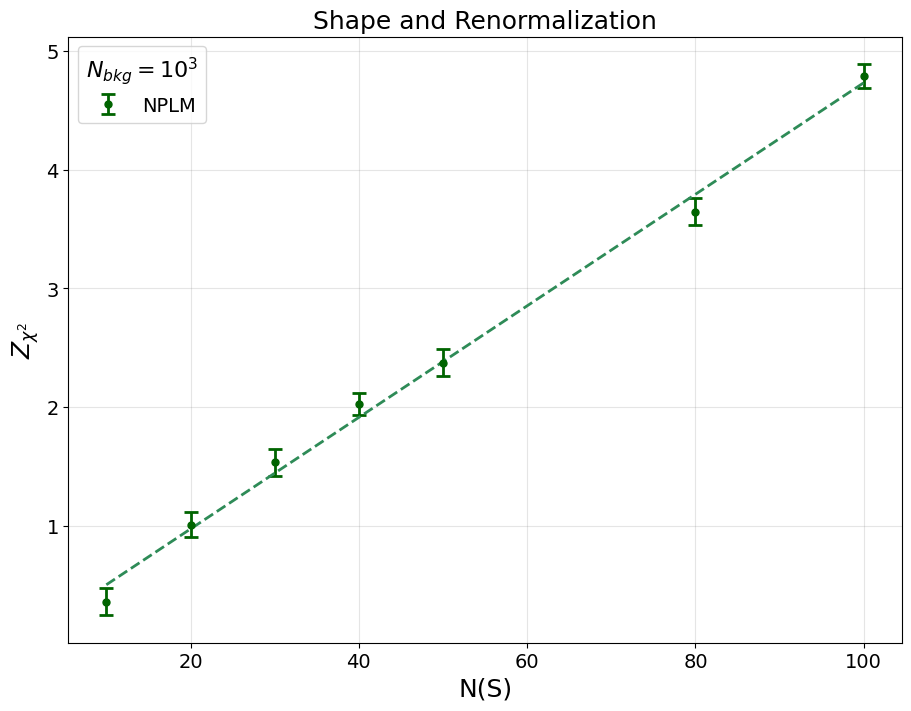

In [201]:
par ,_ =optimize.curve_fit(lambda x,m,q: m*x+q, df_s['N_sig'], df_s['Z_obs'])
m,q = par[0], par[1]

fig, ax = plt.subplots(figsize=(9,7), constrained_layout=True)
ax.set_title('Shape and Renormalization',fontsize = 18)
ax.tick_params(axis = "x", labelsize = 14, which = "major")
ax.tick_params(axis = "y", labelsize = 14, which = "major")
ax.set_xlabel('N(S)', fontsize = 18)
ax.set_ylabel('$Z_{\chi^2}$', fontsize = 18)
ax.errorbar(df_s['N_sig'], df_s['Z_obs'], yerr=np.array((df_s['Z_obs_m'], df_s['Z_obs_p']), ndmin=2),
            label='NPLM',
            marker='o', lw=2, ls='', color='darkgreen',elinewidth=2, capsize=5, markersize=5, capthick=2)
ax.plot(df_s['N_sig'], m*df_s['N_sig']+q, lw=2, linestyle='--', color='seagreen')
ax.grid(color='grey', alpha=0.2, which='major')
ax.legend(fontsize=14, title='$N_{bkg}=10^3$', title_fontsize=16)

## SHAPE-ONLY EFFECT

In [ ]:
json_path = '/home/ubuntu/NPLM-Falkon/output/bank_data/2024_2_28_10_17_sig_10/2024_2_28_10_17_sig_10.json'
with open(json_path) as f:
    config = json.load(f)
    
config

{'OUTPUT_PATH': '/home/ubuntu/NPLM-Falkon/output/bank_data/',
 'DATA_PATH': '/home/ubuntu/NPLM-Falkon/data/creditcard.csv',
 'PLOT_PATH': '/home/ubuntu/NPLM-Falkon/plot/bank/',
 'toys': 100,
 'N_REF': 3000,
 'N_BKG': 1000,
 'N_SIG': 10,
 'M_list': [1500],
 'l_list': [1e-08],
 'sigma': 9.601215794671894,
 'shape_only': False}

In [191]:
def extract_Nsig_SO(file:str):
    matches = re.search(r'_sig_(\d+)_SOn', file)
    return int(matches.group(1))

In [192]:
df_so = pd.DataFrame(columns=['N_sig', 'p_value', 'Z_obs','Z_obs_m', 'Z_obs_p', 'timing'])
folders = [config['OUTPUT_PATH']+directory for directory in os.listdir(config['OUTPUT_PATH']) if 'sig' in directory and '_SOn' in directory]
for dir in folders:
    N_sig = extract_Nsig_SO(dir)
    with open(dir + '/ttest_time_'+str(l)+'_'+str(M)+'.csv') as f:
        t_data = np.array([float(row.split()[0]) for row in f])
    with open(dir + '/ttest_time_'+str(l)+'_'+str(M)+'.csv') as f:
        t_timing = np.array([float(row.split()[1]) for row in f])

    '''ordinare e tirare fuori il numero di signal events e printare solo lo Z score'''
    t_obs = np.median(t_data)
    p_val = 1 - chi2.cdf(np.median(t_data), df_fit)
    Z_obs     = norm.ppf(chi2.cdf(np.median(t_data), df_fit))
    t_obs_err = 1.2533*np.std(t_data)*1./np.sqrt(len(t_data))
    Z_obs_p   = norm.ppf(chi2.cdf(np.median(t_data)+t_obs_err, df_fit))
    Z_obs_m   = norm.ppf(chi2.cdf(np.median(t_data)-t_obs_err, df_fit))
    
    df_so = pd.concat([pd.DataFrame([[N_sig, p_val, Z_obs, Z_obs-Z_obs_m, Z_obs_p-Z_obs, np.mean(t_timing)]], columns=df_so.columns), df_so], ignore_index=True)

df_so = df_so.sort_values('N_sig', ascending =True)
df_so['p_value']     = df_so['p_value'].round(5)


pd.options.display.float_format = '{:,.4f}'.format
df_so


/tmp/ipykernel_28812/3759780404.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_so = pd.concat([pd.DataFrame([[N_sig, p_val, Z_obs, Z_obs-Z_obs_m, Z_obs_p-Z_obs, np.mean(t_timing)]], columns=df_so.columns), df_so], ignore_index=True)


,N_sig,p_value,Z_obs,Z_obs_m,Z_obs_p,timing
3,10,0.2987,0.5281,0.1069,0.1066,5.0411
0,20,0.2048,0.8247,0.1241,0.1238,4.9368
4,30,0.1294,1.1293,0.1142,0.1140,5.2358
1,40,0.0561,1.5887,0.1283,0.1279,5.2030
5,50,0.0392,1.7602,0.1101,0.1099,5.0790
2,80,0.0019,2.8963,0.1121,0.1118,5.3106
6,100,0.0001,3.7401,0.1136,0.1134,4.6495


### Overall performances

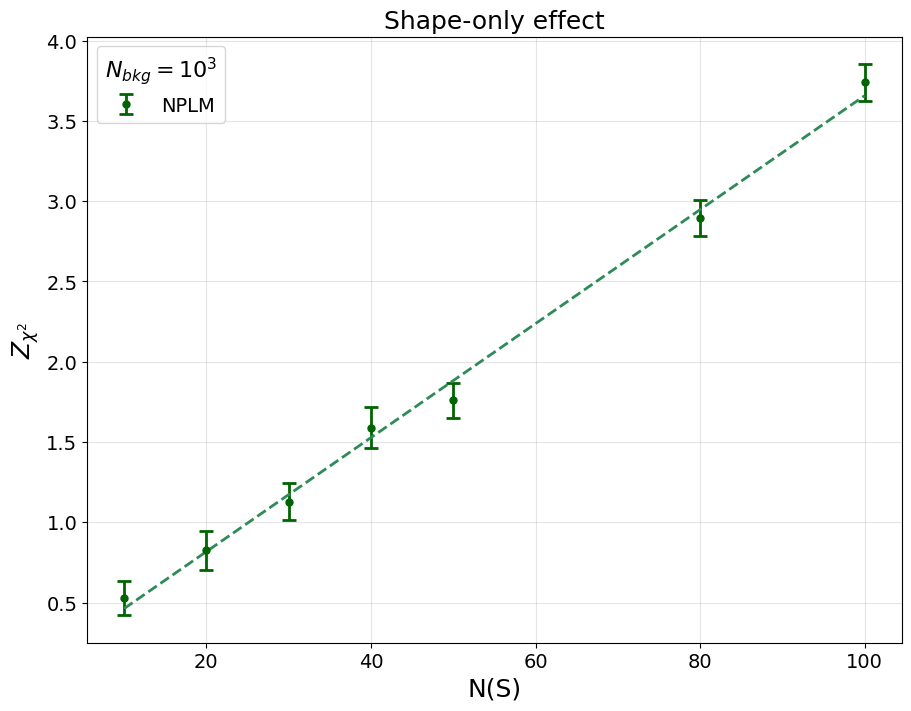

In [200]:
par ,_ =optimize.curve_fit(lambda x,m,q: m*x+q, df_so['N_sig'], df_so['Z_obs'])
m,q = par[0], par[1]

fig, ax = plt.subplots(figsize=(9,7), constrained_layout=True)
ax.set_title('Shape-only effect', fontsize=18)
ax.tick_params(axis = "x", labelsize = 14, which = "major")
ax.tick_params(axis = "y", labelsize = 14, which = "major")
ax.set_xlabel('N(S)', fontsize = 18)
ax.set_ylabel('$Z_{\chi^2}$', fontsize = 18)
ax.errorbar(df_so['N_sig'], df_so['Z_obs'], yerr=np.array((df_so['Z_obs_m'], df_so['Z_obs_p']), ndmin=2),
            label='NPLM',
            marker='o', lw=2, ls='', color='darkgreen',elinewidth=2, capsize=5, markersize=5, capthick=2)
ax.plot(df_so['N_sig'], m*df_so['N_sig']+q, lw=2, linestyle='--', color='seagreen')
ax.grid(color='grey', alpha=0.2, which='major')
ax.legend(fontsize=14, title='$N_{bkg}=10^3$', title_fontsize=16)

# $N_0$ study